In [1]:
from matplotlib import rc
from inspect import signature
from IPython.display import display
from datetime import datetime
import numpy as np
import pandas as pd
import mglearn
import graphviz
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import warnings
import datetime
from sklearn.model_selection import train_test_split

warnings.filterwarnings(action="ignore")
%matplotlib notebook
%matplotlib inline
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')
font_name = fm.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

## 데이터 전처리중

In [2]:
total = pd.read_csv('total0619.csv', sep = ',', encoding = 'utf-8')
area = pd.read_excel('areacode.xlsx')

In [3]:
total

,Unnamed: 0,시군구,번지,본번,부번,단지명,전용면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,도로명
0,0,서울특별시 강남구 개포동,655-2,655,2,개포2차현대아파트(220),77.75,200603,10,59500.0,7,1988,언주로 103
1,1,서울특별시 강남구 개포동,655-2,655,2,개포2차현대아파트(220),77.75,200603,29,60000.0,6,1988,언주로 103
2,2,서울특별시 강남구 개포동,655-2,655,2,개포2차현대아파트(220),77.75,200604,29,67000.0,9,1988,언주로 103
3,3,서울특별시 강남구 개포동,655-2,655,2,개포2차현대아파트(220),77.75,200606,1,60000.0,4,1988,언주로 103
4,4,서울특별시 강남구 개포동,655-2,655,2,개포2차현대아파트(220),77.75,200610,20,72250.0,5,1988,언주로 103
5,5,서울특별시 강남구 개포동,655-2,655,2,개포2차현대아파트(220),77.75,200610,30,73500.0,8,1988,언주로 103
6,6,서울특별시 강남구 개포동,655-2,655,2,개포2차현대아파트(220),77.75,200612,9,76500.0,5,1988,언주로 103
7,7,서울특별시 강남구 개포동,658-1,658,1,개포6차우성아파트1동~8동,67.28,200601,19,54500.0,3,1987,언주로 3
8,8,서울특별시 강남구 개포동,658-1,658,1,개포6차우성아파트1동~8동,79.97,200601,21,67000.0,3,1987,언주로 3
9,9,서울특별시 강남구 개포동,658-1,658,1,개포6차우성아파트1동~8동,79.97,200601,25,67500.0,4,1987,언주로 3


In [4]:
df = total[['시군구', '전용면적(㎡)', '계약년월', '거래금액(만원)', '층', '건축년도']]
df['m^2당가격'] = df['거래금액(만원)']/df['전용면적(㎡)']
area = area[area['폐지여부'] == '존재']

In [5]:
df_key = pd.merge(df, area, left_on = df['시군구'], right_on = area['법정동명'], how = 'inner')
df_data = df_key[['법정동코드', '계약년월','건축년도','m^2당가격']]
df_data.head(1)

,법정동코드,계약년월,건축년도,m^2당가격
0,1168010300,200603,1988,765.273312


In [31]:
data = total[['시군구', '전용면적(㎡)', '거래금액(만원)']]
data['location'] = data['시군구'].str.split(' ').str[1]
data = data.drop(labels='시군구', axis = 1)
data = data.rename({'전용면적(㎡)':'size', '거래금액(만원)':'price'}, axis = 'columns')
# data = data.drop(labels = ['시군구', '전용면적(㎡)', '거래금액(만원)'], axis = 1)
# data = data.drop(labels = 'location', axis = 1)
# data = data.rename({'거래금액(만원)':'price'}, axis = 'columns')

data

,size,price,location
0,77.75,59500.0,강남구
1,77.75,60000.0,강남구
2,77.75,67000.0,강남구
3,77.75,60000.0,강남구
4,77.75,72250.0,강남구
5,77.75,73500.0,강남구
6,77.75,76500.0,강남구
7,67.28,54500.0,강남구
8,79.97,67000.0,강남구
9,79.97,67500.0,강남구


In [24]:
data1 = data

In [ ]:
data['n_location'] = data.location.str.split(' ').str[1]

# KMeans

In [33]:
from sklearn.cluster import KMeans

In [34]:
feature = data[['size','price']]
target = data['location']

In [35]:
kmeans = KMeans(n_clusters = 10, algorithm = 'auto')
kmeans.fit(feature)

KMeans(n_clusters=10)

In [36]:
print('클러스터 레이블:\n{}'.format(kmeans.labels_))
print('kmeans.predict:\n{}'.format(kmeans.predict(feature)))

클러스터 레이블:
[8 8 8 ... 3 7 3]
kmeans.predict:
[8 8 8 ... 3 7 3]


In [37]:
predict = pd.DataFrame(kmeans.predict(feature))
predict.columns = ['predict']
r = pd.concat([data, predict], axis = 1)
r.head()

,size,price,location,predict
0,77.75,59500.0,강남구,8
1,77.75,60000.0,강남구,8
2,77.75,67000.0,강남구,8
3,77.75,60000.0,강남구,8
4,77.75,72250.0,강남구,8


# Visualize result(시각화)

In [38]:
kmeans.cluster_centers_

array([[5.18795403e+01, 1.85411048e+04],
       [1.05881840e+02, 1.17236207e+05],
       [1.36174247e+02, 2.13289939e+05],
       [8.02762770e+01, 4.57947242e+04],
       [1.64467076e+02, 2.99829092e+05],
       [9.38896025e+01, 8.57103498e+04],
       [1.20654759e+02, 1.56900750e+05],
       [6.99170730e+01, 3.19395150e+04],
       [8.66128810e+01, 6.30287626e+04],
       [2.14309082e+02, 4.60707576e+05]])

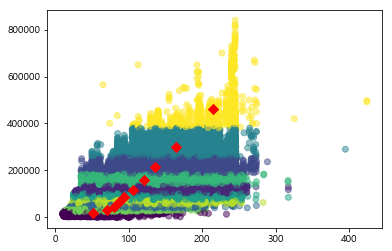

In [39]:
centers = pd.DataFrame(kmeans.cluster_centers_,columns=['size', 'price'])
center_x = centers['size']
center_y = centers['price']

# scatter plot
plt.scatter(r['size'],r['price'],c=r['predict'],alpha=0.5)
plt.scatter(center_x,center_y,s=50,marker='D',c='r')
plt.show()

# Evaluate model with Cross tabuliazation (교차 표로 모델 평가)

In [ ]:
ct = pd.crosstab(df_data['m^2당가격'], r['predict'])
ct.head()

# Standarize value (표준화)

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

scaler = StandardScaler()
model = KMeans(n_clusters=3)
pipeline = make_pipeline(scaler,model)
pipeline.fit(df_data)
predict = pd.DataFrame(pipeline.predict(df_data))
predict.columns=['predict']

# concatenate labels to df as a new column
r = pd.concat([df_data, predict],axis=1)

ct = pd.crosstab(df_data['m^2당가격'],r['predict'])
print(ct)

# Feature distribution check (기능 분포 확인)

In [ ]:
df_data.head()

In [ ]:

import matplotlib.pyplot  as plt

plt.subplot(1,2,1)
plt.hist(df_data['s_code'])
plt.title('법정동코드')
plt.subplot(1,2,2)
plt.hist(df_data['건축년도'])
plt.title('건축년도')
plt.show()

# Determine number of clusters with Inertia value (관성 값에 의한 클러스터 수)

In [ ]:
ks = range(1,10)
inertias = []

for k in ks:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(feature)
    inertias.append(kmeans.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [ ]:
df_code = df_data['법정동코드']
# df_code.reshape(-1, 1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit_transform(arr)
feature = scaler.fit_transform(arr)

In [ ]:
df_data['계약년월'] = pd.to_datetime(df_data['계약년월']).dt.strftime('%Y%m')

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

X, y = make_blobs(random_state=1)

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
X_varied, y_varied = make_blobs(n_samples=200, cluster_std=[1.0, 2.5, 0.5], random_state=170)
y_pred = KMeans(n_clusters=3, random_state=0).fit_predict(X_varied)
mglearn.discrete_scatter(X_varied[:,0], X_varied[:,1], y_pred)
plt.legend(["Cluster 1", "Cluster 2", "Cluster 3"], loc='best')
plt.xlabel("feature 1")
plt.ylabel("feature 2")

In [ ]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

model = TSNE(learning_rate=100)
transformed = model.fit_transform(df_data)

xs = transformed[:,0]
ys = transformed[:,1]
plt.scatter(xs,ys,c=labels)

plt.show()